In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
pwd


'C:\\Users\\Sangeetha\\Documents\\GitHub_local\\final_project\\ETL_code'

In [3]:
merged_df = titles = pd.read_csv('../data_files/TechnicalJobs_Not_DF_draft_UPDATED.csv')
merged_df

,Unnamed: 0,istech,area_title,jobs_1000,tot_emp,emp_prse,population,median_age,average_income,family_poverty,...,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other,city,state_code
0,0,0,"Abilene, TX",12.048520,182230.0,18.251528,85075,27,49583,9368,...,2253,53385,8597,18241,524,15,1860,200,Abilene,TX
1,1,1,"Abilene, TX",8.409250,4450.0,22.500000,85075,27,49583,9368,...,2253,53385,8597,18241,524,15,1860,200,Abilene,TX
2,2,0,"Akron, OH",7.321090,859710.0,19.450928,94894,33,42943,25508,...,2164,54490,31493,1761,134,22,4765,65,Akron,OH
3,3,1,"Akron, OH",6.404353,33910.0,18.882353,94894,33,42943,25508,...,2164,54490,31493,1761,134,22,4765,65,Akron,OH
4,4,0,"Albany, GA",13.685161,153970.0,18.692708,64884,37,59234,13830,...,948,20685,40100,1737,96,24,1241,53,Albany,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,1,"Winston-Salem, NC",5.070765,22180.0,14.558824,33082,27,34263,1864,...,1351,22926,5736,2099,57,0,846,67,Winston-Salem,NC
306,306,0,"Yakima, WA",10.979800,252670.0,17.385490,46258,32,52787,7262,...,285,20719,340,23274,494,10,1095,41,Yakima,WA
307,307,1,"Yakima, WA",4.708300,4250.0,13.860000,46258,32,52787,7262,...,285,20719,340,23274,494,10,1095,41,Yakima,WA
308,308,0,"Yuba City, CA",15.261576,114460.0,21.675294,40959,33,60353,6881,...,3892,19336,874,14832,258,195,1504,68,Yuba City,CA


In [4]:
merged_copy_df = merged_df.drop(['Unnamed: 0'],axis=1)

In [5]:
merged_copy_df.isnull().values.any()

False

In [6]:
merged_copy_df.shape

(310, 24)

In [7]:
merged_copy_df.columns.to_list()

['istech',
 'area_title',
 'jobs_1000',
 'tot_emp',
 'emp_prse',
 'population',
 'median_age',
 'average_income',
 'family_poverty',
 'educational_attainment_bachelors',
 'educational_attainment_graduate',
 'educational_attainment_high_school',
 'educational_attainment_no_diploma',
 'educational_attainment_some_college',
 'race_asian',
 'race_white',
 'race_black',
 'race_hispanic',
 'race_native',
 'race_islander',
 'race_two',
 'race_other',
 'city',
 'state_code']

In [8]:
# Target
y = merged_copy_df['jobs_1000']
y

0      12.048520
1       8.409250
2       7.321090
3       6.404353
4      13.685161
         ...    
305     5.070765
306    10.979800
307     4.708300
308    15.261576
309     6.723333
Name: jobs_1000, Length: 310, dtype: float64

In [9]:
merged_copy_df.dtypes

istech                                   int64
area_title                              object
jobs_1000                              float64
tot_emp                                float64
emp_prse                               float64
population                               int64
median_age                               int64
average_income                           int64
family_poverty                           int64
educational_attainment_bachelors         int64
educational_attainment_graduate          int64
educational_attainment_high_school       int64
educational_attainment_no_diploma        int64
educational_attainment_some_college      int64
race_asian                               int64
race_white                               int64
race_black                               int64
race_hispanic                            int64
race_native                              int64
race_islander                            int64
race_two                                 int64
race_other   

In [10]:
# drop city    state_code   to feed data to scaler # NEED TO DISCUSS THESE COLUMNS 
merged_copy_df=merged_copy_df.drop(['city','state_code','area_title'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
merged_copy_df_scaled = scaler.fit_transform(merged_copy_df)

In [13]:
X = merged_copy_df


X.shape, y.shape

((310, 21), (310,))

In [14]:
X

,istech,jobs_1000,tot_emp,emp_prse,population,median_age,average_income,family_poverty,educational_attainment_bachelors,educational_attainment_graduate,...,educational_attainment_no_diploma,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other
0,0,12.048520,182230.0,18.251528,85075,27,49583,9368,12687,6935,...,10738,29001,2253,53385,8597,18241,524,15,1860,200
1,1,8.409250,4450.0,22.500000,85075,27,49583,9368,12687,6935,...,10738,29001,2253,53385,8597,18241,524,15,1860,200
2,0,7.321090,859710.0,19.450928,94894,33,42943,25508,10769,5611,...,13742,31013,2164,54490,31493,1761,134,22,4765,65
3,1,6.404353,33910.0,18.882353,94894,33,42943,25508,10769,5611,...,13742,31013,2164,54490,31493,1761,134,22,4765,65
4,0,13.685161,153970.0,18.692708,64884,37,59234,13830,9365,7235,...,9037,21217,948,20685,40100,1737,96,24,1241,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1,5.070765,22180.0,14.558824,33082,27,34263,1864,9344,7149,...,1215,10993,1351,22926,5736,2099,57,0,846,67
306,0,10.979800,252670.0,17.385490,46258,32,52787,7262,4255,3145,...,12443,13692,285,20719,340,23274,494,10,1095,41
307,1,4.708300,4250.0,13.860000,46258,32,52787,7262,4255,3145,...,12443,13692,285,20719,340,23274,494,10,1095,41
308,0,15.261576,114460.0,21.675294,40959,33,60353,6881,4382,1966,...,9092,14499,3892,19336,874,14832,258,195,1504,68


In [15]:
# Create a linear model
model = LinearRegression()

# Fit (train) our model to the data
model.fit(X, y)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 1.1036188491655866e-21
R-squared (R2 ): 1.0


In [17]:
model.score(X, y)

1.0

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [21]:
model.score(X_test, y_test)

1.0

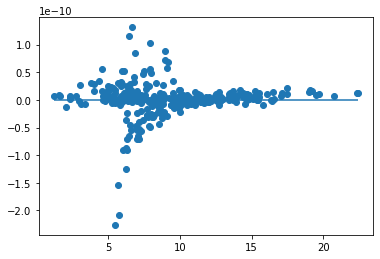

In [22]:
import matplotlib.pyplot as plt

plt.scatter(predicted, predicted - y)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()